# LOAN DEFAULTER

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DATA IMPORT & BASIC EXPLORATION**

In [ ]:
df = pd.read_csv(r'C:\Users\aksha\Desktop\LoanDefaulter\Loan Defaulter.csv')
df.head()



**FEATURE SELECTION**

In [ ]:
df.columns

In [ ]:
df.shape

**CHECKING MISSING VALUES**

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum().sort_values()

**Put missing values column in DataFrame**

In [ ]:
missing_info =pd.DataFrame(df.isnull().sum().sort_values()).reset_index()
missing_info.head()

**RENAME COLUMN NAME**

In [ ]:
missing_info.rename(columns={'index' : 'Column_Name',0: 'Null_Count'},inplace=True)
missing_info

**Calculate % of missing value by column**

In [ ]:
missing_info['Null_Count_Percent'] = missing_info['Null_Count']/df.shape[0]*100
missing_info

Droping columns having missing values > 40%

In [ ]:
missing_column = missing_info[missing_info['Null_Count_Percent']>=40]['Column_Name']
missing_column

CONVERT MISSING COLUMNS TO LIST

In [ ]:
missing_column = missing_info[missing_info['Null_Count_Percent']>=40]['Column_Name'].to_list()
missing_column


CHECK NUMBER OF COLUMN THAT WILL BE DROPPED

In [ ]:
len(missing_column)

DROP MISSING COLUMNS

In [ ]:
df_missing_removed =df.drop(labels = missing_column, axis =1)
df_missing_removed

CHECK NEW SHAPE OF DATAFRAME

In [ ]:
df_missing_removed.shape


CHECKING FLAG COLUMNS

In [ ]:
flag_Column =[]
for column in df_missing_removed:
  if column.startswith("FLAG_"):
    flag_Column.append(column)


CHECK NUMBER OF FLAG COLUMNS

In [ ]:
len(flag_Column)

Looking each flag columns significane with target column

In [ ]:
df_missing_removed[flag_Column + ["TARGET"]].head()

Store in seperate dataframe for analysis

In [ ]:
flag_target_columns = df_missing_removed[flag_Column + ["TARGET"]]
flag_target_columns.head()

In [ ]:
plt.figure(figsize=(20,30))
for i, col in enumerate(flag_Column):
  plt.subplot(7,4,i+1)
  sns.countplot(x=col,data=flag_target_columns,hue="TARGET")

Except for flag document_3 in all of them we have any customer who has submitted documents, customers who are not submitting the documents are most likely to be non defaulters, so this columns are not important so we can drop those columns

In [ ]:
flag_Column

First 8 columns have variables 'N' & 'Y'. Lets check correlation of these variables with target variable

In [ ]:
flag_Correlation = ['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL','TARGET']


In [ ]:
flag_Correlation

In [ ]:
flag_Correlation_df = df_missing_removed[flag_Correlation]

In [ ]:
flag_Correlation_df.head()

Finding correlation & create a new dataframe

In [ ]:
flag_Correlation_df.groupby(['FLAG_OWN_CAR']).size()

In [ ]:
flag_Correlation_df['FLAG_OWN_CAR'] = flag_Correlation_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})


In [ ]:
flag_Correlation_df.groupby(['FLAG_OWN_REALTY']).size()

In [ ]:
flag_Correlation_df['FLAG_OWN_REALTY'] = flag_Correlation_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

In [ ]:
Correlation_df =round(flag_Correlation_df.corr(),2)

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(Correlation_df,cmap ='coolwarm',linewidths=0.5,annot=True)

Correlation coefficient values less than +0.8 or greater than -0.8 are not considered significant

REMOVING FLAG COLUMNS 

In [ ]:
flag_removed_df =df_missing_removed.drop(labels =flag_Column, axis=1)

In [ ]:
flag_removed_df.shape

In [ ]:
flag_removed_df.head()

In [ ]:
sns.heatmap(data=round(flag_removed_df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidths=0.5,annot=True)

DROP COLUMNS EXT_SOURCE_2 & EXT_SOURCE_3

In [ ]:
df_application_data = flag_removed_df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'], axis=1)

In [ ]:
df_application_data.shape

In [ ]:
df_application_data.head()

****Missing Imputation****

SORTING VALUES 

In [ ]:
df_application_data.isnull().sum().sort_values()/df_application_data.shape[0]

CHECKING COLUMN CNT_FAM_MEMBERS

In [ ]:
df_application_data.groupby('CNT_FAM_MEMBERS').size()

In [ ]:
df_application_data['CNT_FAM_MEMBERS'].mode()

FILL MISSING COLUMNS WITH MODE

In [ ]:
df_application_data['CNT_FAM_MEMBERS']=df_application_data['CNT_FAM_MEMBERS'].fillna(df_application_data['CNT_FAM_MEMBERS'].mode()[0])

In [ ]:
df_application_data['CNT_FAM_MEMBERS'].isnull().sum()

CHECKING COLUMN OCCUPATION_TYPE

In [ ]:
df_application_data.groupby('OCCUPATION_TYPE').size().sort_values()

In [ ]:
df_application_data['OCCUPATION_TYPE'].mode()

FILL MISSING COLUMNS WITH MODE

In [ ]:
df_application_data['OCCUPATION_TYPE']=df_application_data['OCCUPATION_TYPE'].fillna(df_application_data['OCCUPATION_TYPE'].mode()[0])

In [ ]:
df_application_data['OCCUPATION_TYPE'].isnull().sum()

CHECKING COLUMN NAME_TYPE_SUITE

In [ ]:
df_application_data.groupby('NAME_TYPE_SUITE').size().sort_values()

In [ ]:
df_application_data['NAME_TYPE_SUITE'].mode()

In [ ]:
df_application_data['CNT_FAM_MEMBERS']=df_application_data['CNT_FAM_MEMBERS'].fillna(df_application_data['CNT_FAM_MEMBERS'].mode()[0])

In [ ]:
df_application_data['CNT_FAM_MEMBERS'].isnull().sum()

CHECKING COLUMN AMT_ANNUITY

In [ ]:
df_application_data.groupby('AMT_ANNUITY').size().sort_values()

In [ ]:
df_application_data.groupby('AMT_ANNUITY').describe()

In [ ]:
df_application_data['AMT_ANNUITY'].mean()

FILL MISSING COLUMNS WITH MEAN

In [ ]:
df_application_data['AMT_ANNUITY']=df_application_data['AMT_ANNUITY'].fillna(df_application_data['AMT_ANNUITY'].mean())

In [ ]:
df_application_data['AMT_ANNUITY'].isnull().sum()

CHECKING 
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR

In [ ]:
amt_req_col =[]
for col in df_application_data:
  if col.startswith('AMT_REQ_CREDIT_BUREAU'):
    amt_req_col.append(col)

amt_req_col 

In [ ]:
for col in amt_req_col:
  df_application_data[col]=df_application_data[col].fillna(df_application_data[col].median())

In [ ]:
df_application_data[col].isnull().sum()

CHECKING COLUMN AMT_GOODS_PRICE

In [ ]:
df_application_data.groupby('AMT_GOODS_PRICE').size().sort_values()

In [ ]:
df_application_data['AMT_GOODS_PRICE'].agg(['min','max','median'])

In [ ]:
df_application_data['AMT_GOODS_PRICE'].mean()

FILL MISSING COLUMNS WITH MEDIAN

In [ ]:
df_application_data['AMT_GOODS_PRICE']=df_application_data['AMT_GOODS_PRICE'].fillna(df_application_data['AMT_GOODS_PRICE'].median())

In [ ]:
df_application_data['AMT_GOODS_PRICE'].isnull().sum()

Value Modification

Convert values from -ve to +ve

In [ ]:
days_col =[]
for col in df_application_data:
  if col.startswith('DAYS'):
    days_col.append(col)

In [ ]:
days_col  

In [ ]:
for col in days_col:
  df_application_data[col] =abs(df_application_data[col])

In [ ]:
df_application_data.head()

In [ ]:
df_application_data.info()

In [ ]:
df_application_data.nunique().sort_values()

# ### Outlier detection & treatment

In [248]:
df_application_data['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         45000.0
max       2254500.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

# # Binning

In [ ]:
df_application_data['AMT_GOODS_PRICE'].agg(['min','max','median'])

In [ ]:
sns.kdeplot(data=df_application_data,x='AMT_GOODS_PRICE')

In [ ]:
sns.boxenplot(data=df_application_data,x='AMT_GOODS_PRICE')

In [249]:
df_application_data['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     369000.0
0.50     450000.0
0.60     540000.0
0.70     675000.0
0.80     832500.0
0.90    1062000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']

df_application_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(df_application_data['AMT_GOODS_PRICE'],bins,labels=ranges)

In [ ]:
df_application_data.groupby(['AMT_GOODS_PRICE_RANGE']).size()

In [ ]:
df_application_data['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

In [ ]:
df_application_data['AMT_INCOME_TOTAL'].max()

In [ ]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

df_application_data['AMT_INCOME_TOTAL_RANGE'] = pd.cut(df_application_data['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [ ]:
df_application_data.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

In [ ]:
df_application_data['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

In [ ]:
df_application_data['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

In [ ]:
df_application_data['AMT_CREDIT'].max()

In [254]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

df_application_data['AMT_CREDIT_RANGE'] = pd.cut(df_application_data['AMT_CREDIT'],bins,labels=ranges)

In [255]:
df_application_data.groupby(['AMT_CREDIT_RANGE']).size()

C:\Users\aksha\AppData\Local\Temp\ipykernel_18496\4011282473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_application_data.groupby(['AMT_CREDIT_RANGE']).size()


AMT_CREDIT_RANGE
0-200K        610
200K-400K    1294
400K-600K    1076
600K-800K     714
800K-900K     350
900K-1M       137
1M-2M         784
2M-3M          35
Above 3M        0
dtype: int64

In [256]:
df_application_data['AMT_CREDIT'].isnull().sum()

np.int64(0)

In [ ]:
df_application_data['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

In [257]:
df_application_data['AMT_ANNUITY'].max()

np.float64(135936.0)

In [258]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

df_application_data['AMT_ANNUITY_RANGE'] = pd.cut(df_application_data['AMT_ANNUITY'],bins,labels=ranges)

In [259]:
df_application_data.groupby(['AMT_ANNUITY_RANGE']).size()

C:\Users\aksha\AppData\Local\Temp\ipykernel_18496\1232608324.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_application_data.groupby(['AMT_ANNUITY_RANGE']).size()


AMT_ANNUITY_RANGE
0-25K         2508
25K-50K       2146
50K-100K       338
100K-150K        8
150K-200K        0
Above 200K       0
dtype: int64

In [260]:
df_application_data['AMT_ANNUITY_RANGE'].isnull().sum()

np.int64(0)

In [ ]:
df_application_data['DAYS_EMPLOYED'].agg(['min','max','median'])

In [ ]:
df_application_data['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

In [ ]:
df_application_data[df_application_data['DAYS_EMPLOYED']<df_application_data['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']

In [261]:
df_application_data['DAYS_EMPLOYED'].max()

np.int64(365243)

In [262]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

df_application_data['DAYS_EMPLOYED_RANGE'] = pd.cut(df_application_data['DAYS_EMPLOYED'],bins,labels=ranges)

In [ ]:
df_application_data.groupby(['DAYS_EMPLOYED_RANGE']).size()

In [ ]:
df_application_data['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

In [ ]:
df_application_data['DAYS_BIRTH'].min()

In [250]:
bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

df_application_data['DAYS_BIRTH_RANGE'] = pd.cut(df_application_data['DAYS_BIRTH'],bins,labels=ranges)

In [ ]:
df_application_data.groupby(['DAYS_BIRTH_RANGE']).size()

In [ ]:
df_application_data['DAYS_BIRTH'].isnull().sum()

In [253]:
df_application_data.dtypes.value_counts()

int64       18
float64     15
object      10
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [ ]:
obj_var = df_application_data.select_dtypes(include=['object']).columns
obj_var

In [ ]:
df_application_data.groupby(['NAME_CONTRACT_TYPE']).size()

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

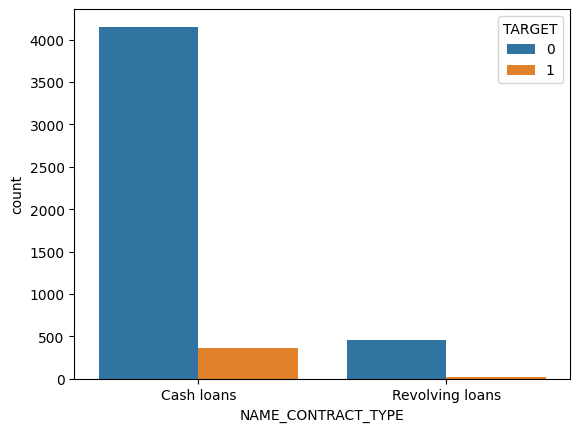

In [263]:
sns.countplot(data=df_application_data,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [264]:
data_pct = df_application_data[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean().sort_values(by='TARGET',ascending=False)


In [265]:
data_pct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.080381
1,Revolving loans,0.047521


In [266]:
data_pct['PCT'] = data_pct['TARGET']*100

In [267]:
data_pct

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.080381,8.038087
1,Revolving loans,0.047521,4.752066


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

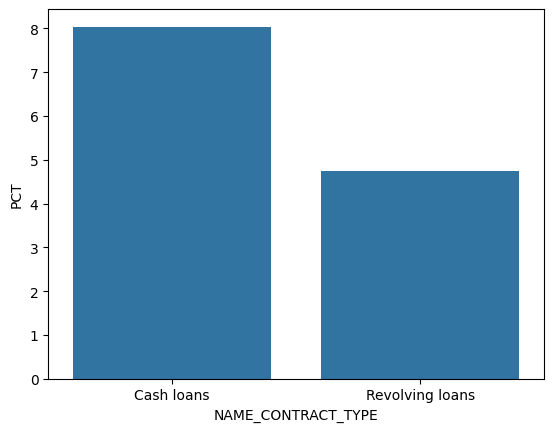

In [268]:
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

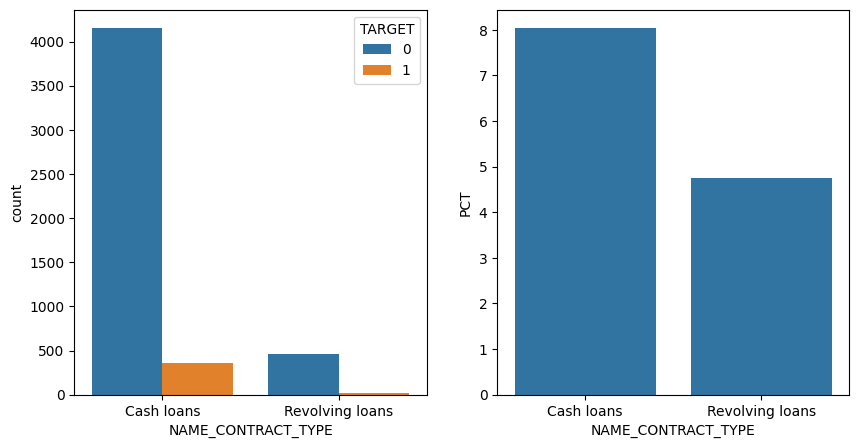

In [269]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=df_application_data,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

In [270]:
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

C:\Users\aksha\AppData\Local\Temp\ipykernel_18496\696865362.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
C:\Users\aksha\AppData\Local\Temp\ipykernel_18496\696865362.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
C:\Users\aksha\AppData\Local\Temp\ipykernel_18496\696865362.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
C:\Users\aksha\AppData\Local\Temp\ipykernel_18496\696865362.py:1

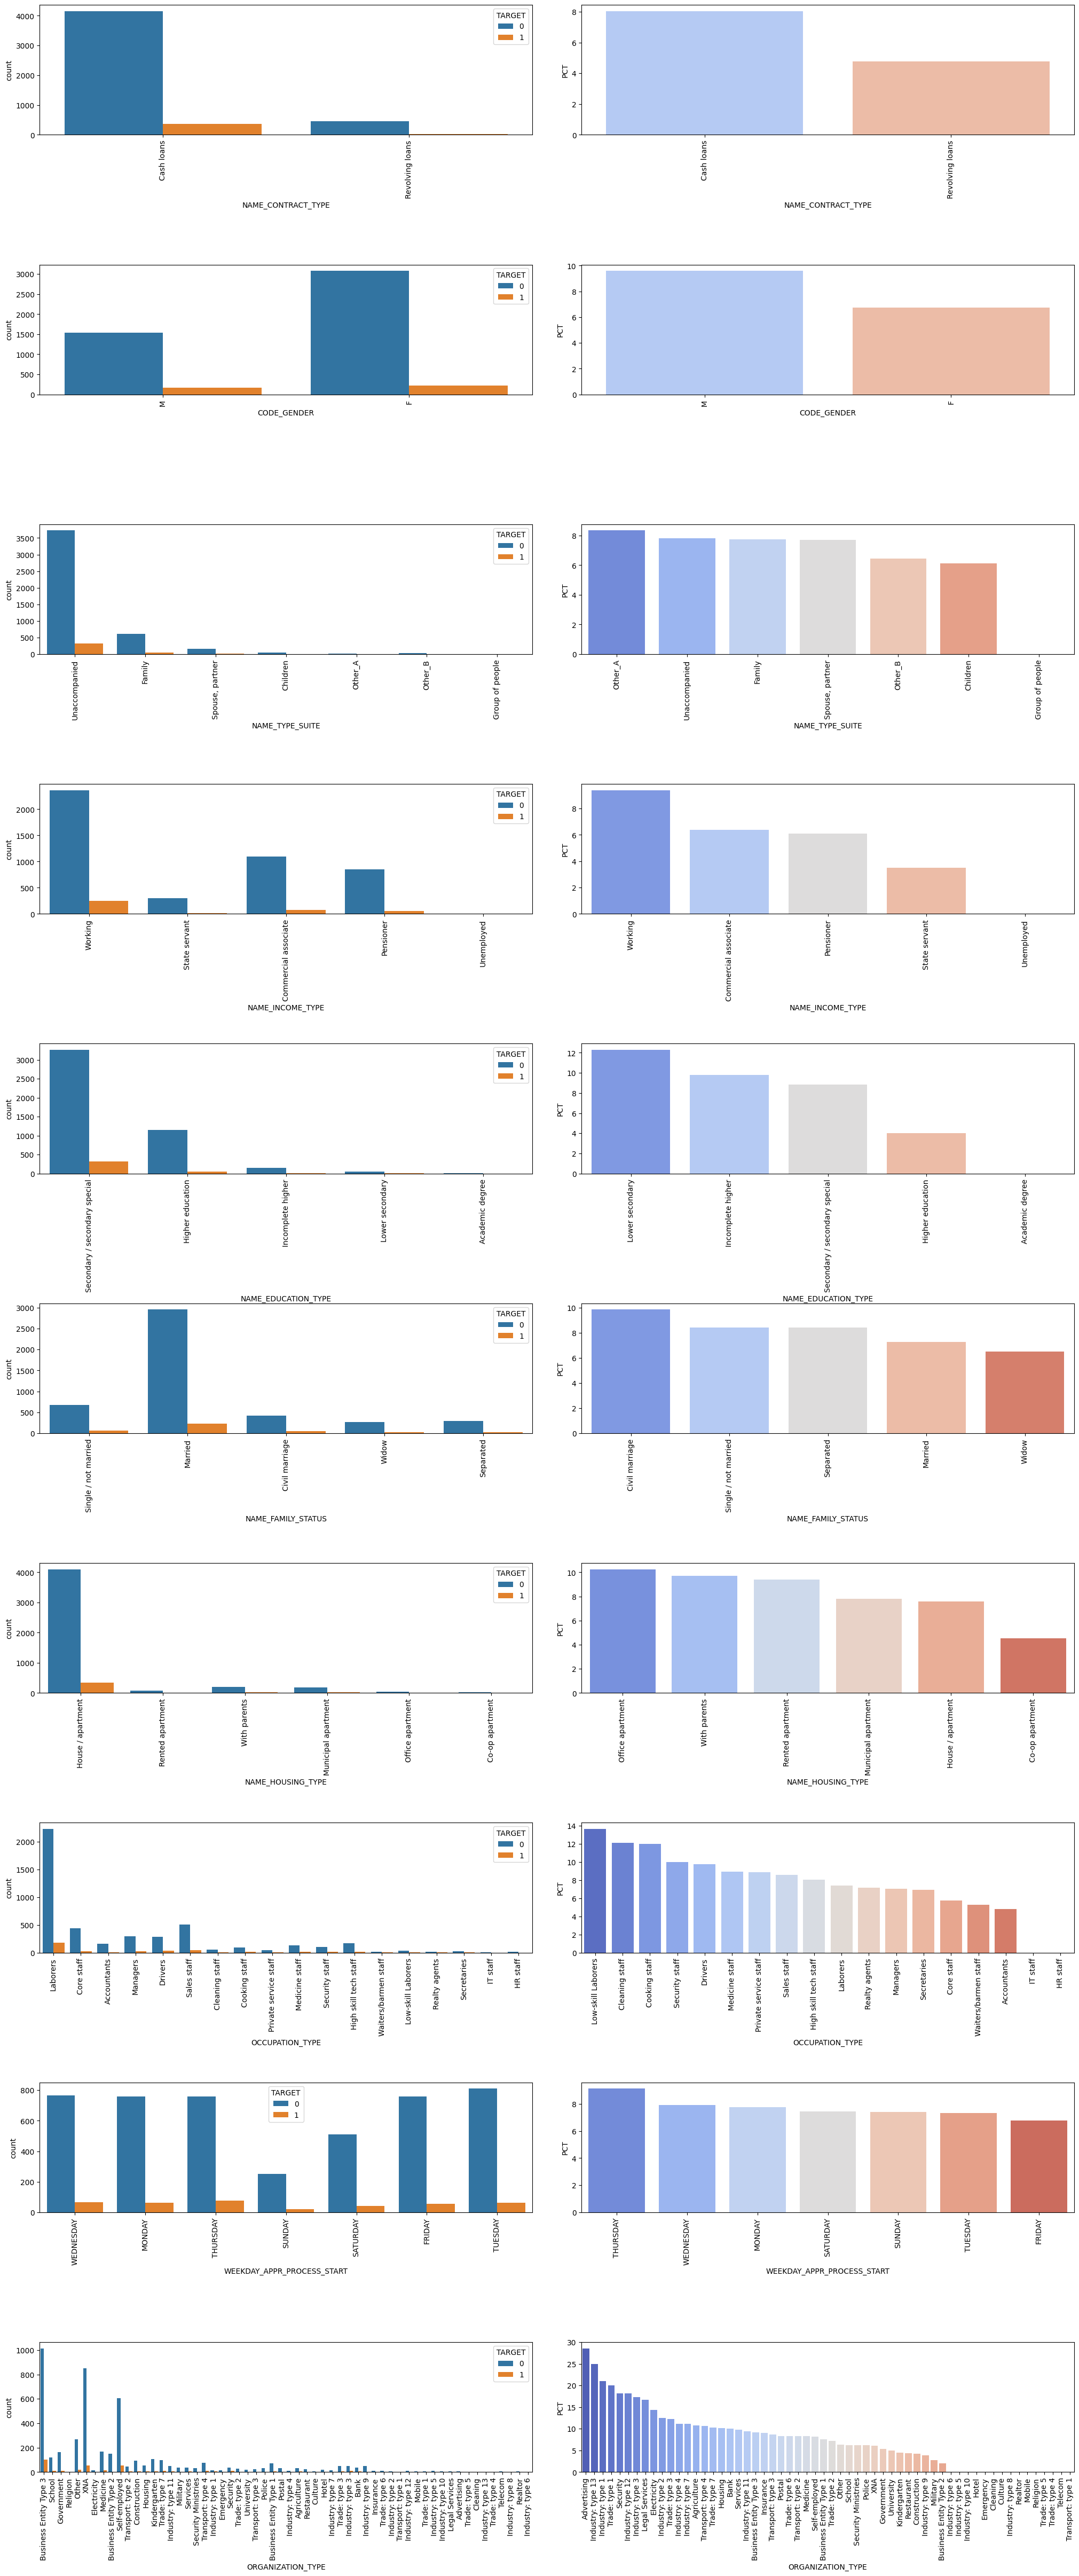

In [271]:
plt.figure(figsize=(25,60))


for i, var in enumerate(obj_var):

    data_pct = df_application_data[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT'] = data_pct['TARGET']*100


    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=df_application_data,x=var,hue='TARGET')
    plt.xticks(rotation=90)

    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)

In [ ]:
df_application_data['NAME_EDUCATION_TYPE'].unique()

In [ ]:
df_application_data.dtypes.value_counts()

In [ ]:
num_var = df_application_data.select_dtypes(include=['float64','int64']).columns
num_cat_var = df_application_data.select_dtypes(include=['float64','int64','category']).columns
len(num_var)

In [ ]:
num_data = df_application_data[num_var]
defaulters = num_data[num_data['TARGET']==1]
repayers = num_data[num_data['TARGET']==0]
repayers.head()

In [ ]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

In [ ]:
defaulter_corr = defaulters.corr()
defaulter_corr_unstck = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})
defaulter_corr_unstck['corr'] = abs(defaulter_corr_unstck['corr'])
defaulter_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

In [ ]:
repayers_corr = repayers.corr()
repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'corr'})
repayers_corr_unstck['corr'] = abs(repayers_corr_unstck['corr'])
repayers_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

In [ ]:
num_data.head()

In [ ]:
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

In [ ]:
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET')

In [ ]:
plt.figure(figsize=(15,10))

for i, col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [ ]:
num_data.head()

In [ ]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

In [ ]:
amt_var = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

In [ ]:
sns.pairplot(data=amt_var,hue='TARGET')